In [2]:
from scipy import constants as C
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def GetFit(x,y,n):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

In [4]:
h_teorico = np.array([434,486.1,656.2])
h_obs = np.array([322,362,502])

_x = np.linspace(np.min(h_obs),np.max(h_obs),50)
param = GetFit(h_obs,h_teorico,2)
ym = GetModel(_x,param)
R=h_teorico-h_obs
R

array([112. , 124.1, 154.2])

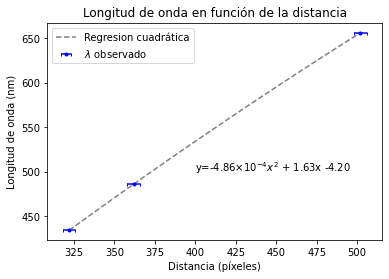

In [5]:
plt.errorbar(h_obs,h_teorico,xerr=4,capsize=1.5,color='b',fmt='.',label = r"$\lambda$ observado")
plt.plot(_x,ym,color='grey',linestyle='--',label = "Regresion cuadrática")
plt.text(400, 500, r'y=-4.86$\times 10^{-4}x^2$ + 1.63x -4.20')
plt.title('Longitud de onda en función de la distancia')
plt.ylabel('Longitud de onda (nm)')
plt.xlabel('Distancia (píxeles)')
plt.legend()
plt.show()

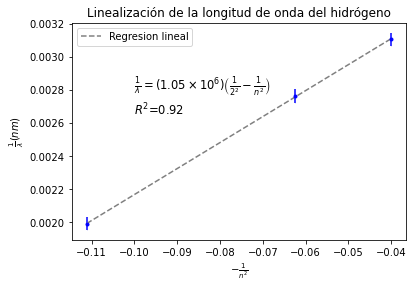

array([-0.11310314, -0.06526243, -0.04310559])

In [6]:
n_2 =np.array([-1/9,-1/16,-1/25])
l =np.array([(1/502),(1/362),(1/322)])

_x = np.linspace(np.min(n_2),np.max(n_2),50)
param = GetFit(n_2,l,1)
ym = GetModel(_x,param)

plt.errorbar(n_2,l,yerr=0.00004,capsize=0.05,color='b',fmt='.')
plt.plot(_x,ym,color='grey',linestyle='--',label = "Regresion lineal")
plt.text(-0.10, 0.0028, r'$\frac{1}{\lambda} = (1.05\times 10^6)\left(\frac{1}{2^2} -\frac{1}{n^2}\right)$',fontsize='11.5')
plt.text(-0.10, 0.00265, '$R^2$={}'.format(0.92),fontsize='11.5')
plt.title('Linealización de la longitud de onda del hidrógeno')
plt.ylabel(r'$\frac{1}{\lambda} (nm)$')
plt.xlabel(r'$-\frac{1}{n^2}$')
plt.legend()
plt.show()
n_2-l

In [13]:
n=1
N = len(n_2)
def GetError(x,y,p):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
    
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot( R.T, R )/(N-len(p))
    
    CVar = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    return CVar

Cov =GetError(n_2,l,param)
std = np.sqrt(np.diag(Cov))
std

array([1.10015271e-05, 1.42616911e-04])

In [8]:
def R(x):
    return -0.000468*(x**2)+1.63*x-4.2

R(431)

611.3938519999999

In [9]:
def Resample(sample):
    
    resample_ = np.random.choice( sample, size=len(sample), replace=True )
    return resample_

def Bootstrapping(sample, N = int(1e5)):
    
    Mean_Dist = np.zeros( N )
    
    for i in range(N):
        resample_ = Resample(sample)
        Mean_Dist[i] = np.mean(resample_)
        
    return Mean_Dist
    
b =Bootstrapping(h_obs)
std = np.std(b)
params = np.percentile(b,50,axis=0)
std

44.558907706540566

In [10]:

 
473

611

611

In [11]:
581/11

52.81818181818182